In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Linki do zbiorów danych z UCI
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

white = pd.read_csv(url_white, sep=';')

In [226]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [227]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [228]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [229]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

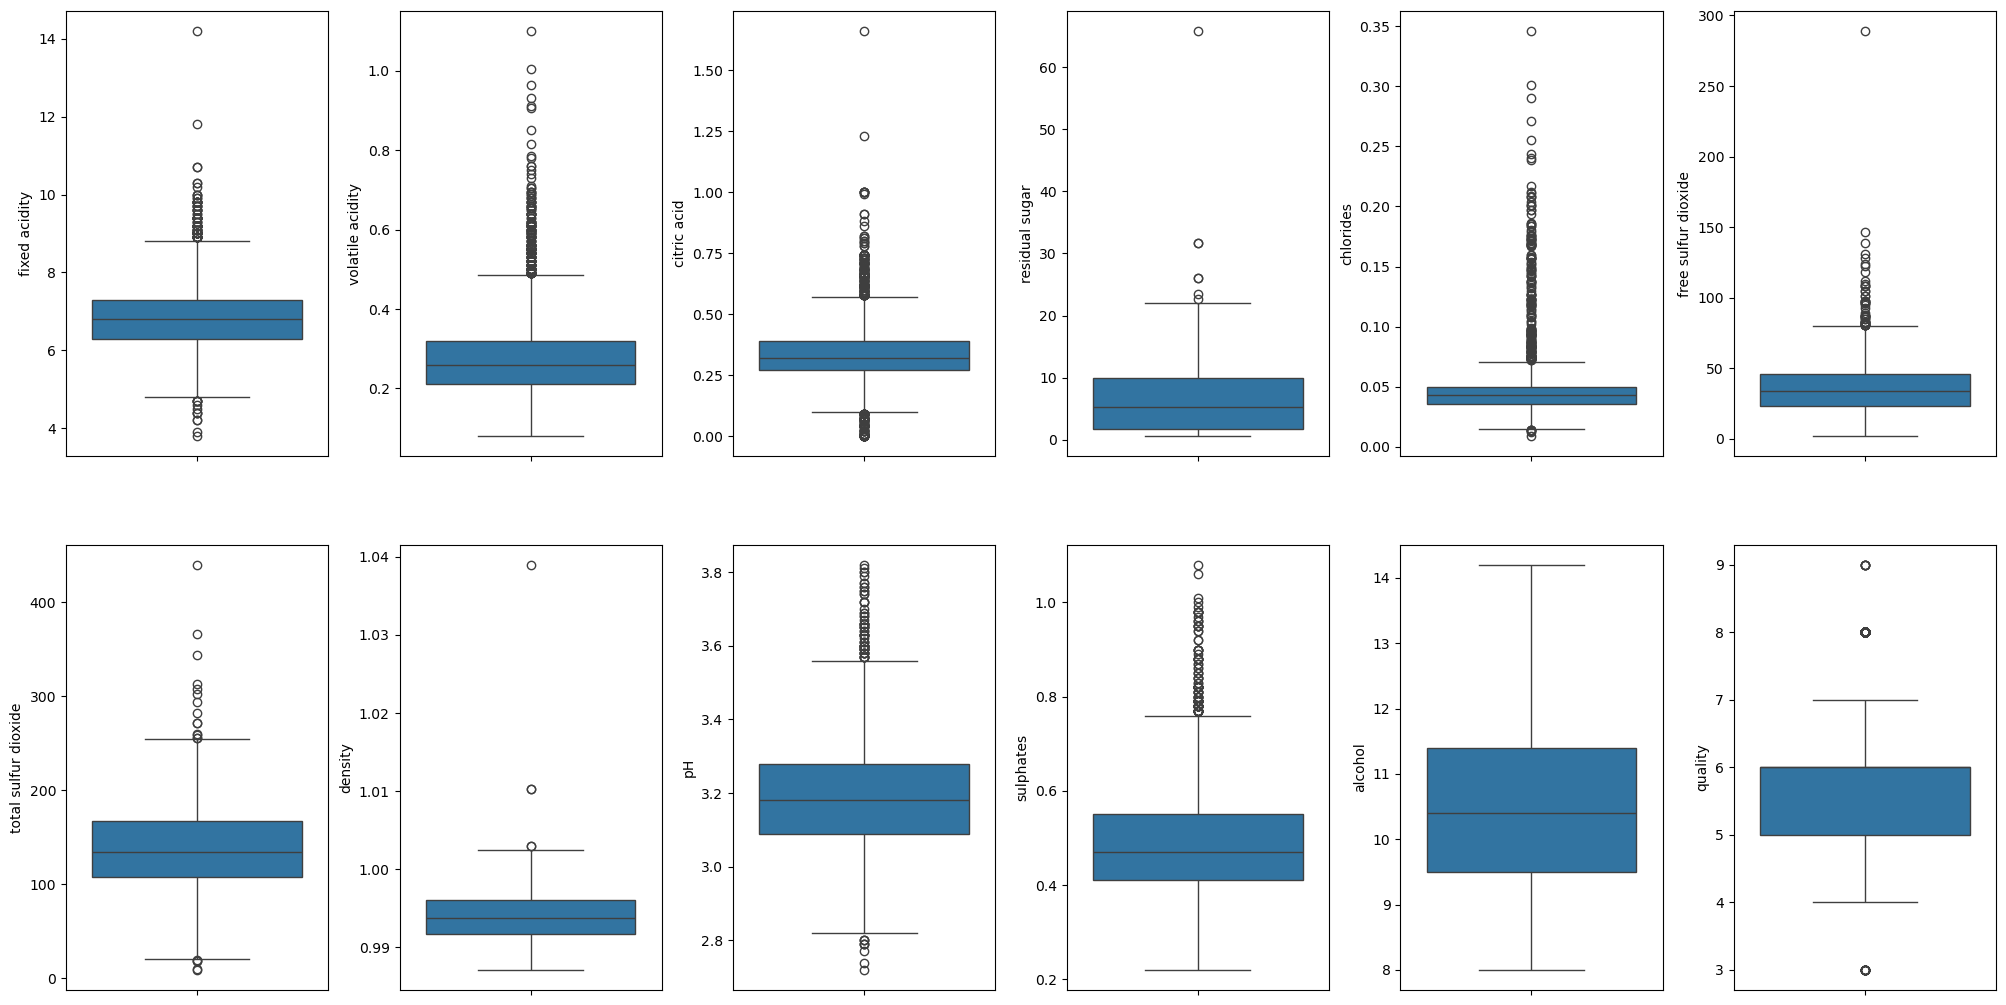

In [17]:
# wykresy pudełkowe dla wektorów cech
figure, table = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
table = table.flatten()

for col, value in white.items():
        sns.boxplot(y=col, data=white, ax=table[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.8, h_pad=6.0)



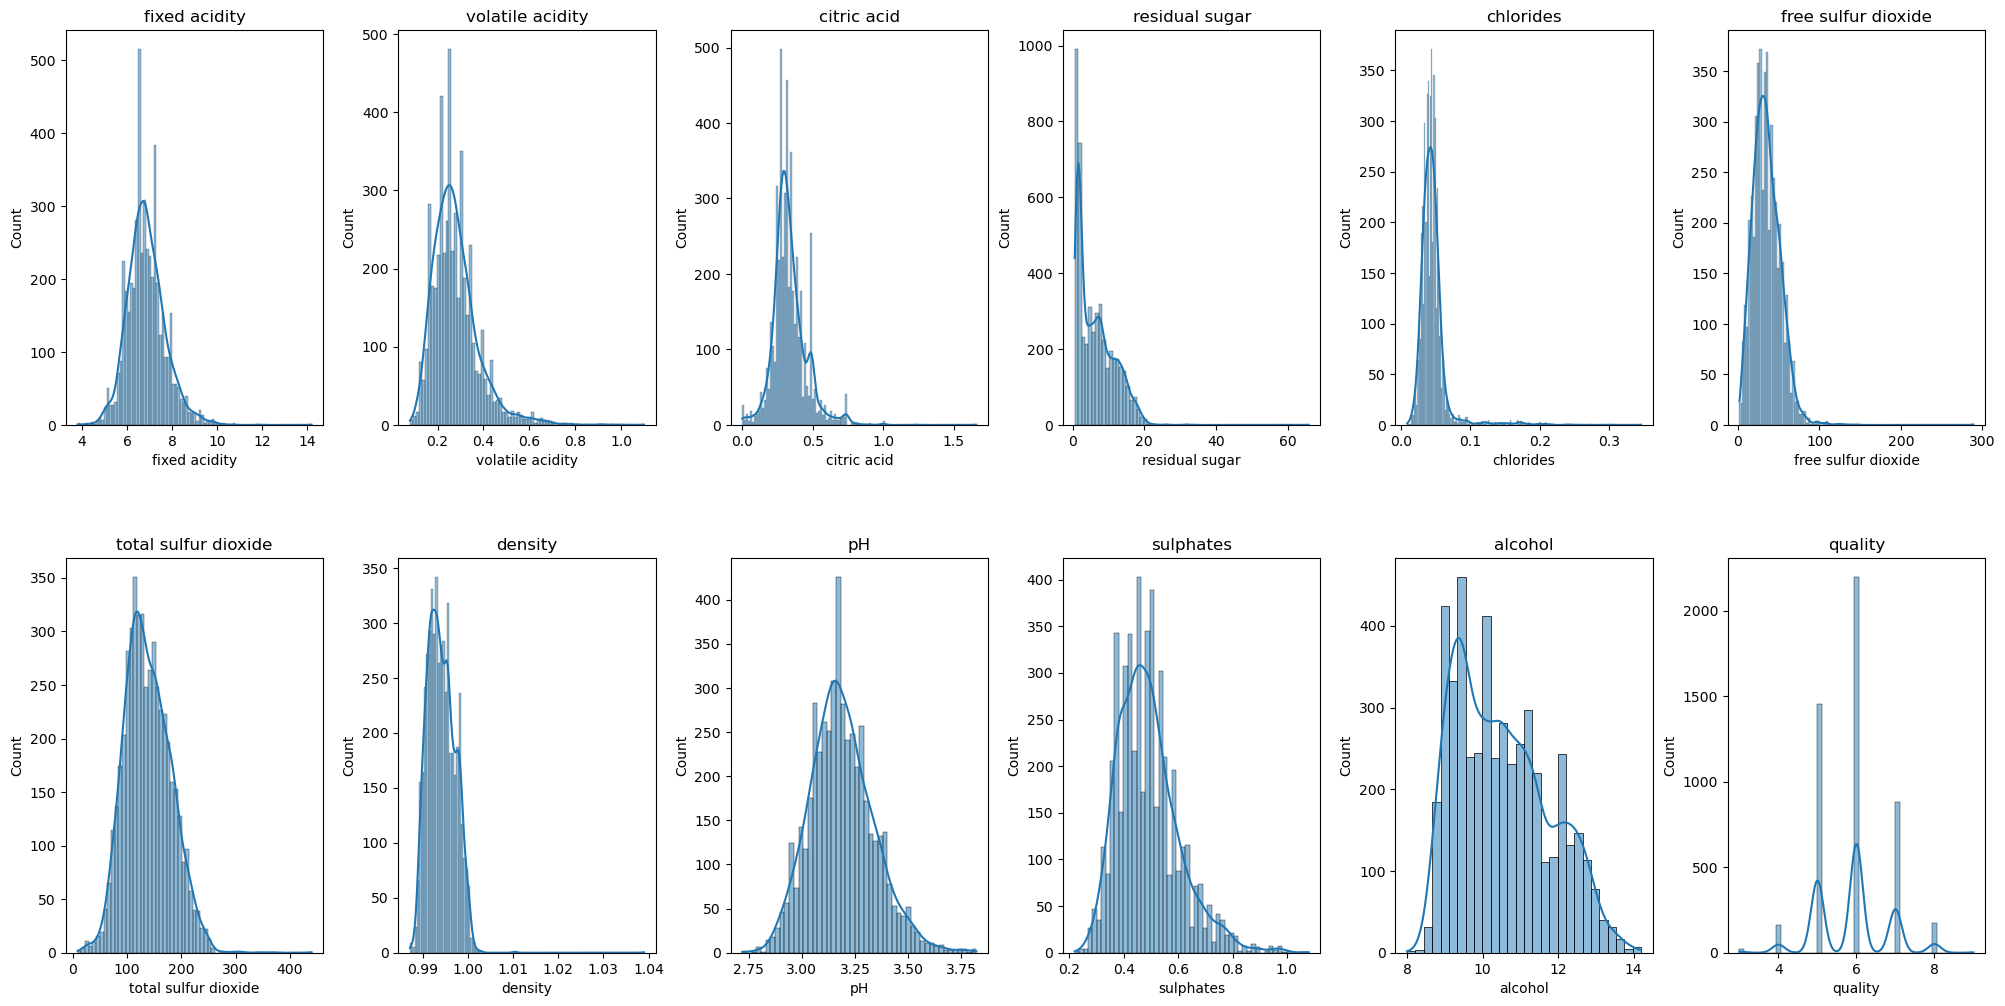

In [195]:
#histogramy i wykresy gęstości
fig, table = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
table = table.flatten()

for col, value in white.items():
        sns.histplot(value, kde=True, ax=table[index])  
        table[index].set_title(col)
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: xlabel='quality', ylabel='count'>

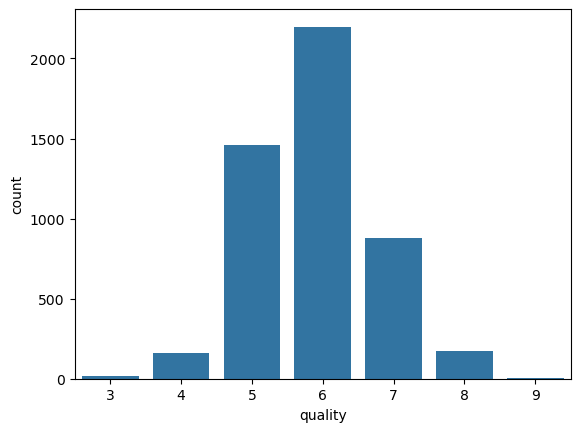

In [20]:
sns.countplot(x='quality', data=white)

<Axes: >

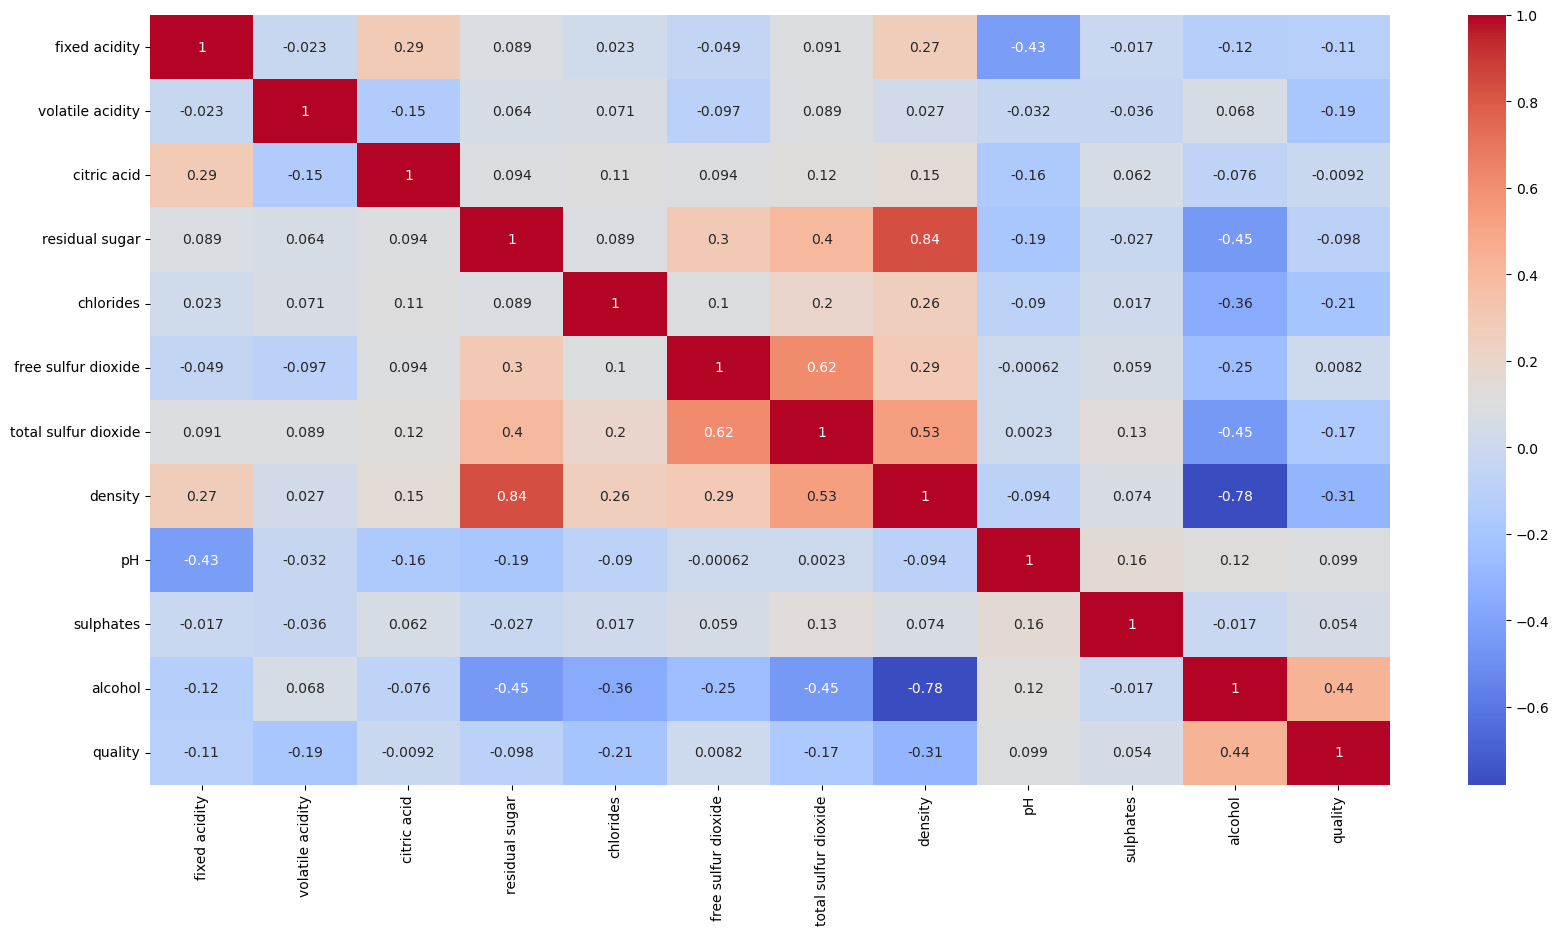

In [21]:
corr = white.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [3]:
X = white.drop(columns=['quality'])
y_ = white['quality']
y_.value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

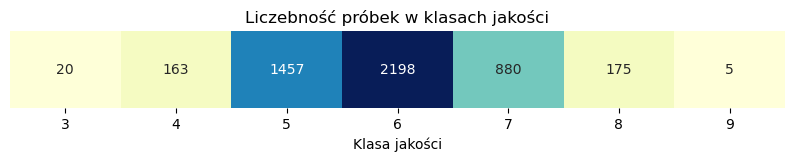

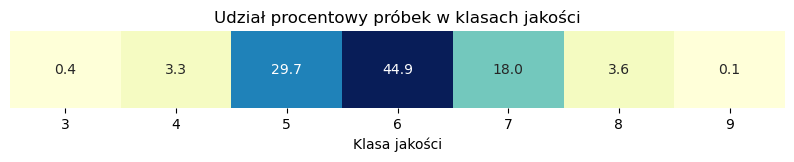

In [145]:
# Zakładamy: y to seria z jakością
class_counts = y_.value_counts().sort_index()

# Konwersja do ramki danych (jednowierszowej)
heat_data = pd.DataFrame([class_counts])

# Rysuj heatmapę
plt.figure(figsize=(10, 1))
sns.heatmap(heat_data, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Liczebność próbek w klasach jakości")
plt.xlabel("Klasa jakości")
plt.yticks([], [])  # Usuwamy nazwę wiersza
plt.show()


# Przelicz na procenty
class_percents = 100 * class_counts / class_counts.sum()

# Umieść jako jednowierszową ramkę danych
heat_data_pct = pd.DataFrame([class_percents])

# Rysuj heatmapę
plt.figure(figsize=(10, 1))
sns.heatmap(heat_data_pct, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False)
plt.title("Udział procentowy próbek w klasach jakości")
plt.xlabel("Klasa jakości")
plt.yticks([], [])
plt.show()

In [116]:
from scipy.spatial.distance import euclidean
from itertools import combinations

# Oblicz centroidy – średnie wartości cech w każdej klasie
centroids = white.groupby('quality').mean()

# Krok 2: Oblicz odległości i zapisz do listy
distances = []
for (label1, label2) in combinations(centroids.index, 2):
    dist = euclidean(centroids.loc[label1], centroids.loc[label2])
    distances.append((label1, label2, dist))

# Krok 3: Posortuj listę odległości rosnąco
distances_sorted = sorted(distances, key=lambda x: x[2])

# Krok 4: Wypisz wyniki
print("Posortowane odległości między centroidami klas:")
for label1, label2, dist in distances_sorted:
    print(f"Klasa {label1} odległość od Klasa {label2} : {dist:.2f}")

# (Opcjonalnie) Pokaż centroidy jako DataFrame
centroids.head()

Posortowane odległości między centroidami klas:
Klasa 7 odległość od Klasa 8 : 2.85
Klasa 7 odległość od Klasa 9 : 9.27
Klasa 8 odległość od Klasa 9 : 10.85
Klasa 4 odległość od Klasa 7 : 10.86
Klasa 6 odległość od Klasa 8 : 11.01
Klasa 6 odległość od Klasa 7 : 12.12
Klasa 4 odległość od Klasa 8 : 13.52
Klasa 4 odległość od Klasa 9 : 13.84
Klasa 5 odległość od Klasa 6 : 13.93
Klasa 4 odległość od Klasa 6 : 17.12
Klasa 6 odległość od Klasa 9 : 21.36
Klasa 5 odległość od Klasa 8 : 24.87
Klasa 3 odległość od Klasa 5 : 25.98
Klasa 5 odległość od Klasa 7 : 26.03
Klasa 4 odległość od Klasa 5 : 28.90
Klasa 5 odległość od Klasa 9 : 35.27
Klasa 3 odległość od Klasa 6 : 37.93
Klasa 3 odległość od Klasa 8 : 47.47
Klasa 3 odległość od Klasa 7 : 49.40
Klasa 3 odległość od Klasa 4 : 54.36
Klasa 3 odległość od Klasa 9 : 58.20


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
np.random.seed(42)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

W celu uproszczenia analizy oraz zredukowania liczby klas, dokonano podziału zmiennej quality na trzy grupy jakości na podstawie kwantyli rozkładu:

Słaba jakość (low - "1") — klasy mniejsze lub równe wartości 25. percentyla (quality < Q1),

Średnia jakość (medium - "2") — klasy większe bądź równe wartości 25 percentyla oraz większe bądź równe wartości 75 percentyla (Q1<=quality<=Q3),

Wysoka jakość (high - "3") — klasy większe niż 75. percentyl (quality > Q3).



In [4]:
def map_quality(q):
    if q <= 4:
        return 0
    elif q==5 or q == 6:
        return 1
    else:
        return 2

y = y_.map(map_quality)

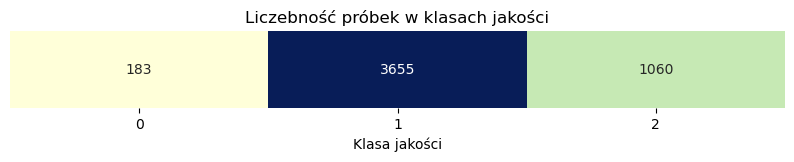

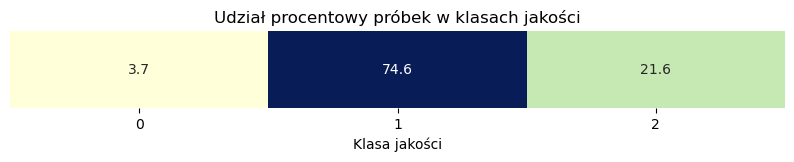

In [235]:
# Zakładamy: y to seria z jakością
class_counts = y.value_counts().sort_index()

# Konwersja do ramki danych (jednowierszowej)
heat_data = pd.DataFrame([class_counts])

# Rysuj heatmapę
plt.figure(figsize=(10, 1))
sns.heatmap(heat_data, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Liczebność próbek w klasach jakości")
plt.xlabel("Klasa jakości")
plt.yticks([], [])  # Usuwamy nazwę wiersza
plt.show()


class_percents = 100 * class_counts / class_counts.sum()


heat_data_pct = pd.DataFrame([class_percents])

# Rysuj heatmapę
plt.figure(figsize=(10, 1))
sns.heatmap(heat_data_pct, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False)
plt.title("Udział procentowy próbek w klasach jakości")
plt.xlabel("Klasa jakości")
plt.yticks([], [])
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Przeskalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
import joblib

joblib.dump(scaler, "scaler_white.pkl")

['scaler_white.pkl']

In [239]:
clf = RandomForestClassifier(random_state=42, class_weight='balanced')


param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],            # liczba drzew w lesie
    'max_depth': [None, 10, 20],            # maksymalna głębokość drzewa
    'min_samples_split': [2, 4],            # min. liczba próbek do podziału
    'min_samples_leaf': [1, 2, 4],              # min. liczba próbek w liściu
    'max_features': ['sqrt'],     # liczba cech do losowania przy podziale
    'bootstrap': [True]                  # czy losować próbki z powtórzeniami
}

# Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')
grid_search.fit(X_train_scaled, y_train)

# Najlepsze parametry
print(grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 250}


In [159]:
logreg_grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    param_grid={
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Dopasowanie
logreg_grid.fit(X_train_scaled, y_train)

# Najlepsze parametry
print("LogReg - najlepsze parametry:", logreg_grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
LogReg - najlepsze parametry: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [207]:
# Funkcja budująca sieć
def create_model(neurons=32):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(3, activation='softmax'))  # 3 klasy (0,1,2)
    model.compile(
        optimizer='adam', 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )
    return model

In [166]:
# Adapter scikeras
model = KerasClassifier(model=create_model, verbose=0)

# Siatka parametrów
param_grid = {
    'batch_size': [32, 64],
    'epochs': [30, 50],
    'model__neurons': [32, 64]  
}

# GridSearchCV
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3
)

# Uczenie
grid_result = grid.fit(X_train_scaled, y_train)

# Wyniki
print("Najlepsze parametry:", grid_result.best_params_)
print("Najlepsza dokładność (CV):", grid_result.best_score_)

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C

Najlepsze parametry: {'batch_size': 64, 'epochs': 50, 'model__neurons': 64}
Najlepsza dokładność (CV): 0.785604900459418


In [18]:
rf = RandomForestClassifier( 
    class_weight='balanced',
    bootstrap=True,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=250,
    random_state=42
)

rf.fit(X_train_scaled, y_train)

lr = LogisticRegression(
    C=0.1,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

lr.fit(X_train_scaled, y_train)

seq = Sequential()
seq.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
seq.add(Dense(3, activation='softmax'))  # 3 klasy (0,1,2)


# Kompilacja
seq.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = seq.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=64,
    verbose=1
)


Epoch 1/50


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5615 - loss: 0.9404
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7736 - loss: 0.6272
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7744 - loss: 0.5876
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7854 - loss: 0.5426
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7846 - loss: 0.5391
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7865 - loss: 0.5221
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7806 - loss: 0.5184
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7772 - loss: 0.5268
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7810 - loss: 0.5290
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7751 - loss: 0.5236
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7746 - loss: 0.5140
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7930 - loss: 0.4947


In [21]:
joblib.dump(rf, "whitewino_rf.pkl")

['whitewino_rf.pkl']

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

Random Forest
Accuracy: 0.8397959183673469
Classification report:
               precision    recall  f1-score   support

           0       0.47      0.27      0.34        30
           1       0.89      0.89      0.89       723
           2       0.71      0.75      0.73       227

    accuracy                           0.84       980
   macro avg       0.69      0.64      0.65       980
weighted avg       0.84      0.84      0.84       980

F1-score (macro): 0.6538463067593238


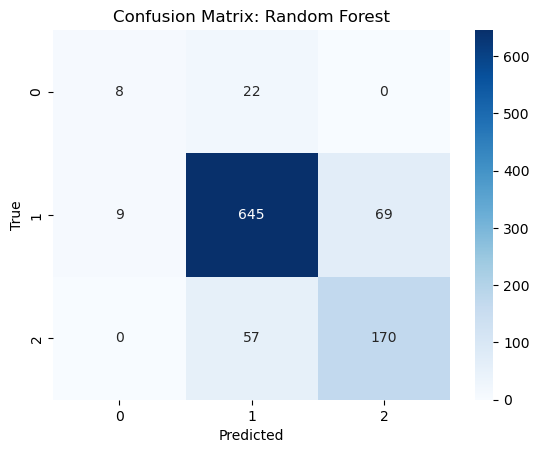


Logistic Regression
Accuracy: 0.75
Classification report:
               precision    recall  f1-score   support

           0       0.24      0.23      0.24        30
           1       0.83      0.84      0.83       723
           2       0.56      0.53      0.54       227

    accuracy                           0.75       980
   macro avg       0.54      0.54      0.54       980
weighted avg       0.75      0.75      0.75       980

F1-score (macro): 0.5382998563678434


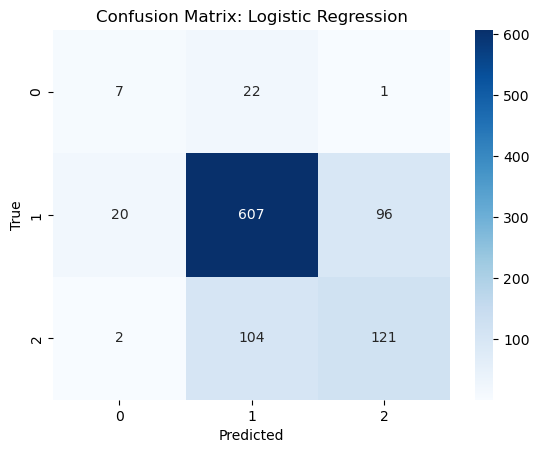


Neural Network
Accuracy: 0.7846938775510204
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.07      0.12        30
           1       0.80      0.94      0.87       723
           2       0.67      0.37      0.48       227

    accuracy                           0.78       980
   macro avg       0.71      0.46      0.49       980
weighted avg       0.77      0.78      0.75       980

F1-score (macro): 0.4897934934254591


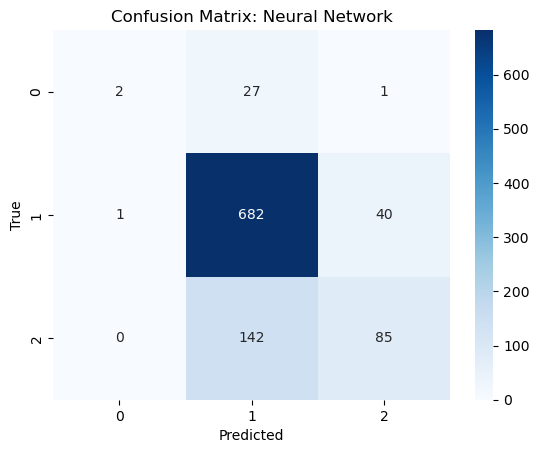

In [241]:
y_rf_pred = rf.predict(X_test_scaled)  
y_lr_pred = lr.predict(X_test_scaled)
y_seq_pred = np.argmax(seq.predict(X_test_scaled), axis=1)

# Słownik modeli
models = {
    "Random Forest": y_rf_pred,
    "Logistic Regression": y_lr_pred,
    "Neural Network": y_seq_pred
}

# Ocena każdego modelu
for name, preds in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification report:\n", classification_report(y_test, preds))
    print("F1-score (macro):", f1_score(y_test, preds, average='macro'))
    
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

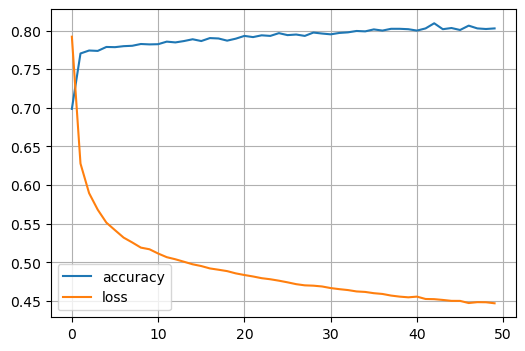

In [242]:
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)

In [243]:
model1_cv = (y_rf_pred == y_test).astype(int)
model2_cv = (y_lr_pred == y_test).astype(int)
model3_cv = (y_seq_pred == y_test).astype(int)

from scipy.stats import friedmanchisquare

stat, pval = friedmanchisquare(model1_cv, model2_cv, model3_cv)
print("Friedman test → stat:", stat, "p-value:", pval)

Friedman test → stat: 51.598253275116 p-value: 6.24570781589166e-12


In [244]:
from scipy.stats import wilcoxon

# Trafienia binarne
acc = {
    "Random Forest": (y_rf_pred == y_test).astype(int),
    "Logistic Regression": (y_lr_pred == y_test).astype(int),
    "Neural Network": (y_seq_pred == y_test).astype(int)
}

# Lista par
from itertools import combinations

print("Test Wilcoxona – porównanie par modeli:")
for model1, model2 in combinations(acc.keys(), 2):
    stat, p = wilcoxon(acc[model1], acc[model2])
    print(f"{model1} vs {model2} → stat: {stat:.2f}, p-value: {p:.4f}")
    if p < 0.05:
        print("Różnica istotna statystycznie")
    else:
        print("Różnica nieistotna statystycznie")

Test Wilcoxona – porównanie par modeli:
Random Forest vs Logistic Regression → stat: 2557.50, p-value: 0.0000
Różnica istotna statystycznie
Random Forest vs Neural Network → stat: 3748.50, p-value: 0.0000
Różnica istotna statystycznie
Logistic Regression vs Neural Network → stat: 4513.50, p-value: 0.0058
Różnica istotna statystycznie


In [245]:
# Zastosowanie undersamplingu do klasy 2 - redukujemy ją do 1500 próbek
cc = ClusterCentroids(sampling_strategy={1: 1500})
X_train_balanced_, y_train_balanced_ = cc.fit_resample(X_train, y_train)

# Zastosowanie oversamplingu do klas 0 i 1 - zwiększamy je do 1500 próbek
smt2 = SMOTE(sampling_strategy={0: 1500, 2: 1500})
X_train_balanced, y_train_balanced = smt2.fit_resample(X_train_balanced_, y_train_balanced_)

print(y_train_balanced.value_counts())

quality
0    1500
1    1500
2    1500
Name: count, dtype: int64


In [204]:
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)

In [205]:
clf = RandomForestClassifier(random_state=42, class_weight='balanced')


param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],            # liczba drzew w lesie
    'max_depth': [None, 10, 20],            # maksymalna głębokość drzewa
    'min_samples_split': [2, 4],            # min. liczba próbek do podziału
    'min_samples_leaf': [1, 2, 4],              # min. liczba próbek w liściu
    'max_features': ['sqrt'],     # liczba cech do losowania przy podziale
    'bootstrap': [True]                  # czy losować próbki z powtórzeniami
}

# Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')
grid_search.fit(X_train_balanced_scaled, y_train_balanced)

# Najlepsze parametry
print(grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [214]:
logreg_grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    param_grid={
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Dopasowanie
logreg_grid.fit(X_train_balanced_scaled, y_train_balanced)

# Najlepsze parametry
print("LogReg - najlepsze parametry:", logreg_grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
LogReg - najlepsze parametry: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [215]:
# Adapter scikeras
model = KerasClassifier(model=create_model, verbose=0)

# Siatka parametrów
param_grid = {
    'batch_size': [32, 64],
    'epochs': [30, 50],
    'model__neurons': [32, 64]  
}

# GridSearchCV
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3
)

# Uczenie
grid_result = grid.fit(X_train_balanced_scaled, y_train_balanced)

# Wyniki
print("Najlepsze parametry:", grid_result.best_params_)
print("Najlepsza dokładność (CV):", grid_result.best_score_)

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C

Najlepsze parametry: {'batch_size': 32, 'epochs': 50, 'model__neurons': 64}
Najlepsza dokładność (CV): 0.758888888888889


In [217]:
rf = RandomForestClassifier( 
    class_weight='balanced',
    bootstrap=True,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

rf.fit(X_train_balanced_scaled, y_train_balanced)

lr = LogisticRegression(
    C=0.01,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

lr.fit(X_train_balanced_scaled, y_train_balanced)

seq = Sequential()
seq.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
seq.add(Dense(3, activation='softmax'))  # 3 klasy (0,1,2)

# Kompilacja
seq.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = seq.fit(
    X_train_balanced_scaled, y_train_balanced,
    epochs=50,
    batch_size=32,
    verbose=1
)

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5177 - loss: 0.9757
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6730 - loss: 0.7476
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6852 - loss: 0.6963
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7063 - loss: 0.6618
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7141 - loss: 0.6527
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7201 - loss: 0.6424
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7227 - loss: 0.6267
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7303 - loss: 0.6207
Epoch 9/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7322 - loss: 0.6110
Epoch 10/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7474 - loss: 0.5943
Epoch 11/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7487 - loss: 0.5883
Epoch 12/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Random Forest
Accuracy: 0.6846938775510204
Classification report:
               precision    recall  f1-score   support

           0       0.14      0.60      0.22        30
           1       0.88      0.68      0.77       723
           2       0.55      0.71      0.62       227

    accuracy                           0.68       980
   macro avg       0.52      0.66      0.54       980
weighted avg       0.78      0.68      0.72       980

F1-score (macro): 0.5375312812812812


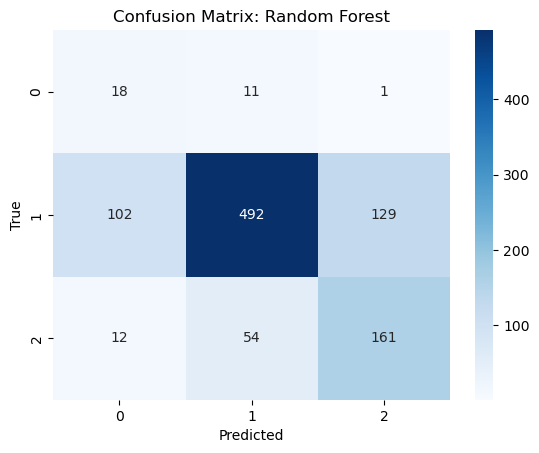


Logistic Regression
Accuracy: 0.42959183673469387
Classification report:
               precision    recall  f1-score   support

           0       0.06      0.67      0.12        30
           1       0.87      0.32      0.47       723
           2       0.41      0.74      0.53       227

    accuracy                           0.43       980
   macro avg       0.45      0.58      0.37       980
weighted avg       0.74      0.43      0.47       980

F1-score (macro): 0.3735652785311987


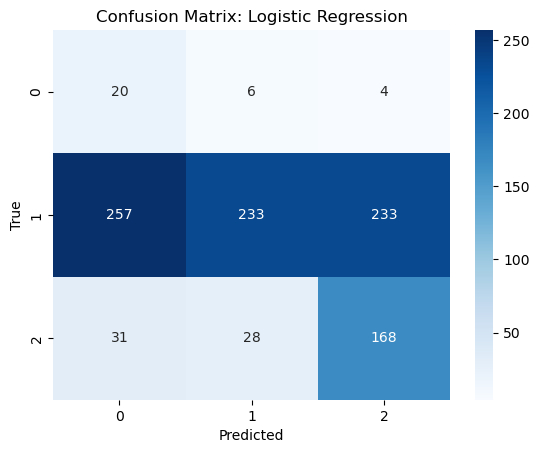


Neural Network
Accuracy: 0.5836734693877551
Classification report:
               precision    recall  f1-score   support

           0       0.11      0.70      0.19        30
           1       0.90      0.52      0.66       723
           2       0.47      0.77      0.58       227

    accuracy                           0.58       980
   macro avg       0.49      0.66      0.48       980
weighted avg       0.77      0.58      0.63       980

F1-score (macro): 0.47783040177690594


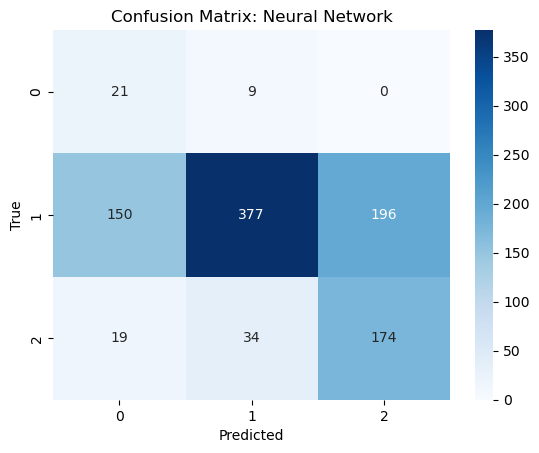

In [218]:
y_rf_pred = rf.predict(X_test_scaled)  
y_lr_pred = lr.predict(X_test_scaled)
y_seq_pred = np.argmax(seq.predict(X_test_scaled), axis=1)

# Słownik modeli
models = {
    "Random Forest": y_rf_pred,
    "Logistic Regression": y_lr_pred,
    "Neural Network": y_seq_pred
}

# Ocena każdego modelu
for name, preds in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification report:\n", classification_report(y_test, preds))
    print("F1-score (macro):", f1_score(y_test, preds, average='macro'))
    
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

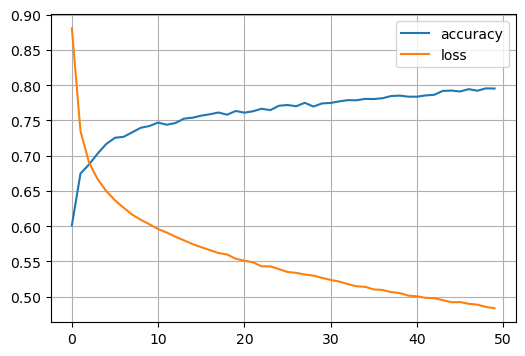

In [219]:
pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)

In [220]:
model1_cv = (y_rf_pred == y_test).astype(int)
model2_cv = (y_lr_pred == y_test).astype(int)
model3_cv = (y_seq_pred == y_test).astype(int)

from scipy.stats import friedmanchisquare

stat, pval = friedmanchisquare(model1_cv, model2_cv, model3_cv)
print("Friedman test → stat:", stat, "p-value:", pval)

Friedman test → stat: 229.16144578313683 p-value: 1.7307100505243534e-50


In [221]:
from scipy.stats import wilcoxon

# Trafienia binarne
acc = {
    "Random Forest": (y_rf_pred == y_test).astype(int),
    "Logistic Regression": (y_lr_pred == y_test).astype(int),
    "Neural Network": (y_seq_pred == y_test).astype(int)
}

# Lista par
from itertools import combinations

print("Test Wilcoxona – porównanie par modeli:")
for model1, model2 in combinations(acc.keys(), 2):
    stat, p = wilcoxon(acc[model1], acc[model2])
    print(f"{model1} vs {model2} → stat: {stat:.2f}, p-value: {p:.4f}")
    if p < 0.05:
        print("Różnica istotna statystycznie")
    else:
        print("Różnica nieistotna statystycznie")

Test Wilcoxona – porównanie par modeli:
Random Forest vs Logistic Regression → stat: 7035.00, p-value: 0.0000
Różnica istotna statystycznie
Random Forest vs Neural Network → stat: 5616.00, p-value: 0.0000
Różnica istotna statystycznie
Logistic Regression vs Neural Network → stat: 10005.00, p-value: 0.0000
Różnica istotna statystycznie
